In [1]:
from typing import TypedDict, Literal

In [2]:
class PortfolioState(TypedDict):
    percentage : float
    amount_curr : Literal["USD", "INR", "AED"]
    amount : float
    total_amount : float
    target_currency : Literal["USD", "INR", "AED"]
    total : float

In [3]:
mock_rates = {
    "USD": {"INR": 85.58, "AED": 3.67, "USD": 1.0},
    "INR": {"USD": 0.012, "AED": 0.044, "INR": 1.0},
    "AED": {"USD": 0.28, "INR": 24.00, "AED": 1.0},
}

In [4]:
def cal_total(state : PortfolioState) -> PortfolioState:
    state['total_amount'] = state['amount'] * (1 + (state['percentage'])/100)
    return state

In [5]:
def convert_currency(state : PortfolioState) -> PortfolioState:
    rate = mock_rates[state['amount_curr']][state['target_currency']]
    state['total'] = state['total_amount'] * rate
    return state

In [6]:
from langgraph.graph import StateGraph, START, END

builder = StateGraph(PortfolioState)

builder.add_node("cal_total_node", cal_total)
builder.add_node("convert_currency_node", convert_currency)


builder.add_edge(START, "cal_total_node")
builder.add_edge("cal_total_node", "convert_currency_node")
builder.add_edge("convert_currency_node", END)

graph = builder.compile()

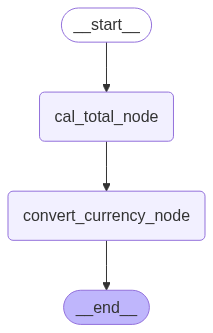

In [7]:
from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))

In [8]:
input_data = {
    'percentage' : 10.0,
    "amount_curr": "USD",
    "amount": 100.0,
    "total_amount": 0.0,
    "target_currency": "INR",
    "total": 0.0
}

result = graph.invoke(input_data)
print(result)


{'percentage': 10.0, 'amount_curr': 'USD', 'amount': 100.0, 'total_amount': 110.00000000000001, 'target_currency': 'INR', 'total': 9413.800000000001}
